# Exploring Hyperparameters in Neural Networks with PyTorch

- Author: Sebastian Schuetz, swschuetz@outlook.com
- Date: Feb 12, 2025

**Objective:**  
In this assignment, you will explore how different hyperparameters affect the performance of a neural network. We will:

1. Create a simple two-class classification problem.
2. Build a neural network using PyTorch.
3. Experiment with:
    - **Learning Rate**: Try different learning rates (e.g., 0.1, 0.01, 0.001).
    - **Epochs**: Compare more vs. fewers epochs. 
    - **Activation Functions**: Compare using ReLU versus Softplus.

**Note:** You do not need advanced coding skills to complete this assignment. Follow the instructions and comments carefully.

---
## Assignment Tasks:

1. **Experimentation**: In this workbook, there are four experiments. Conduct them carefully by changing the model parameters as explained in each experiment. After modifying the parameters, execute the code blocks and observe how the model behavior and performance changes.

2. **Documentation**: Document the outcomes of your experiments by explaining how changes in a hyperparameter affected model outcomes. Use the assignment template to document your findings.

3. **Submission**: Submit your documented findings to the assignment on CANVAS.


In [1]:
# Import necessary packages
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# For creating a synthetic "moons" dataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
torch.manual_seed(4)
np.random.seed(4)

## Step 1: Create a Synthetic Dataset
We will use scikit-learn's `make_moons` to generate a two-class dataset. This dataset will be split into training and testing sets.

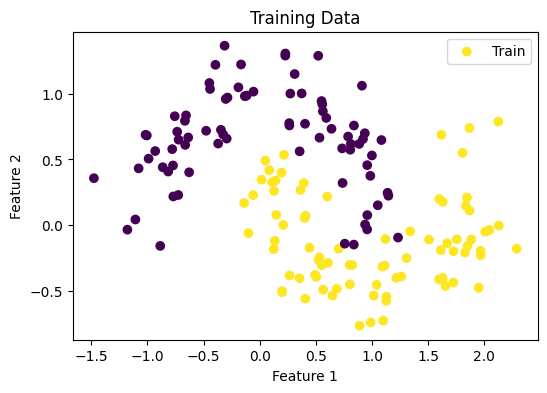

In [10]:
# Generate a "moons" dataset with 200 samples
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors and set dtype to float32
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

# Optional: Visualize the dataset
plt.figure(figsize=(6,4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train')
plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Step 2: Define the Neural Network Model
We will create a simple network with:
- One hidden layer.
- A configurable activation function.
- Two outputs (for two classes).

<div style="border: 2px solid red; padding: 10px; color: red;">
<b>Experiment 3:</b> Change the activation function from ReLU to Softplus. Observe how it affects the loss, the decision boundary and test accuracy. 
<p></p>
You can change the activation function by uncommenting the line below the 'Configuration 2' comment in the code below.
</div>


In [3]:
# Define the simple neural network model
class SimpleNet(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16, output_dim=2, activation_func=nn.ReLU):
        """
        input_dim: Number of input features
        hidden_dim: Number of neurons in the hidden layer
        output_dim: Number of output classes
        activation_func: Activation function class (e.g., nn.ReLU or nn.Softplus)
        """
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.act = activation_func()  # Instantiate the activation function
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x

# Configuration 1: Instantiate the network using ReLU as the activation function.
net = SimpleNet(activation_func=nn.ReLU)

# Configuration 2: Instantiate the network using Softplus as the activation function by uncommenting the 
# next line (i.e., removing the leading #).

#net = SimpleNet(activation_func=nn.Softplus)


print(net)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (act): ReLU()
  (fc2): Linear(in_features=16, out_features=2, bias=True)
)


## Step 3: Define Weight Initialization
Weight initialization can affect how fast the network learns.

We provide a simple function that you can apply to your model.
**Task:**  
 - Try using Xavier (Glorot) initialization.
 - (Optionally) Experiment with other initializations.

## Step 4: Train the Network
We will now define a training loop. 

In [4]:
def train_model(model, X_train, y_train, learning_rate=0.01, epochs=100):
    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    loss_history = []
    
    # Training loop
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        optimizer.zero_grad()  # Zero the parameter gradients
        
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.item())
        
        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
            
    return loss_history

def reset_weights(m):
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()

Now we will run the training. The following two experiments apply to the code below:

<div style="border: 2px solid red; padding: 10px; color: red;">
<b>Experiment 1:</b> Adjust the learning rate. Try different values (e.g., 0.01, 0.10, 0.5, 0.7, 0.9). Observe (and note down) how different learning rates affect training outcomes (i.e., loss after 100 epochs, test accuracy).
</div>

<p></p>

<div style="border: 2px solid red; padding: 10px; color: red;">
<b>Experiment 2:</b> Adjust the number of epochs. Try different values (e.g., 10, 100, 200, 1000). Observe (and note down) how different learning rates affect training outcomes (i.e., loss and test accuracy).
</div>

Epoch [10/100], Loss: 0.3684
Epoch [20/100], Loss: 0.3219
Epoch [30/100], Loss: 0.3026
Epoch [40/100], Loss: 0.2949
Epoch [50/100], Loss: 0.2899
Epoch [60/100], Loss: 0.2863
Epoch [70/100], Loss: 0.2836
Epoch [80/100], Loss: 0.2814
Epoch [90/100], Loss: 0.2797
Epoch [100/100], Loss: 0.2784


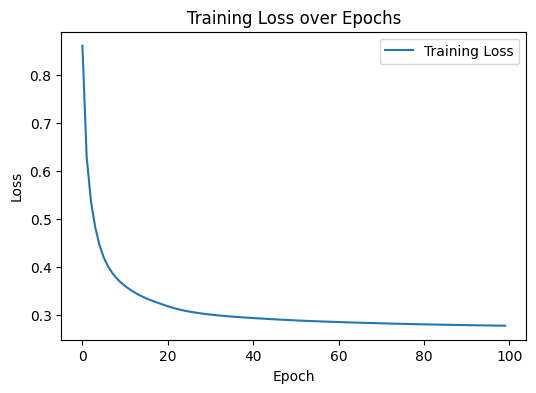

In [5]:
net.apply(reset_weights)

loss_history = train_model(net, X_train, y_train, learning_rate=0.7, epochs=100)

plt.figure(figsize=(6,4))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

## Step 5: Evaluate the Model and Visualize the Decision Boundary
Now, let's evaluate our model on the test set and plot the decision boundary.

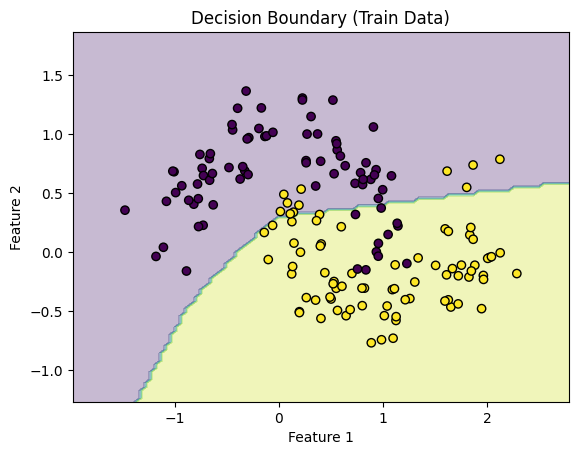

Test Accuracy: 85.00%


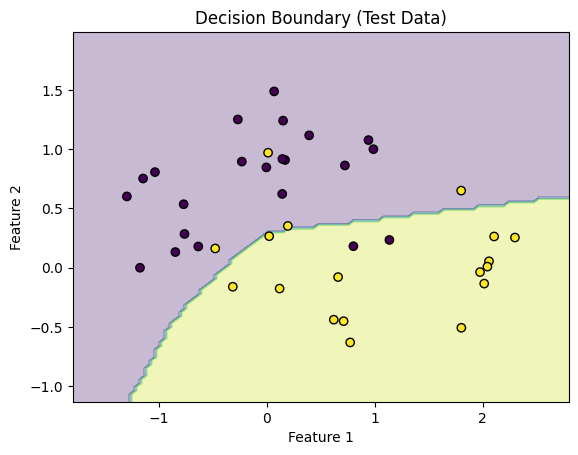

In [6]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Create a mesh grid over the data
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Prepare grid points for prediction
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    
    # Get model predictions
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(grid_tensor)
        predictions = torch.argmax(outputs, dim=1).numpy()
    
    # Plot the contour and data points
    predictions = predictions.reshape(xx.shape)
    plt.contourf(xx, yy, predictions, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundary on the training data
plot_decision_boundary(net, X_train.numpy(), y_train.numpy(), title="Decision Boundary (Train Data)")

# Evaluate on the test set
net.eval()
with torch.no_grad():
    test_outputs = net(X_test)
    test_preds = torch.argmax(test_outputs, dim=1)
    accuracy = (test_preds == y_test).float().mean()
    print(f"Test Accuracy: {accuracy*100:.2f}%")

# Plot decision boundary on the test data
plot_decision_boundary(net, X_test.numpy(), y_test.numpy(), title="Decision Boundary (Test Data)")

<div style="border: 2px solid red; padding: 10px; color: red;">
<b>Experiment 4:</b> Can you find the optimal combination of learning rate, epochs, and activation function that maximizes the models accuracy?
</div>